In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical

In [3]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
x_train.shape,y_train.shape # 60000 greyscale images of dimensions 28x28

((60000, 28, 28), (60000,))

In [5]:
x_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [6]:
# normalizing the data is not required for small datasets
# we can use minmax scaler if we want to normalize the data in the range (0,1) for faster convergence to prevent stuck in local minima

In [7]:
# determining number of classes
ul=np.unique(y_train)
ul # 10 labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

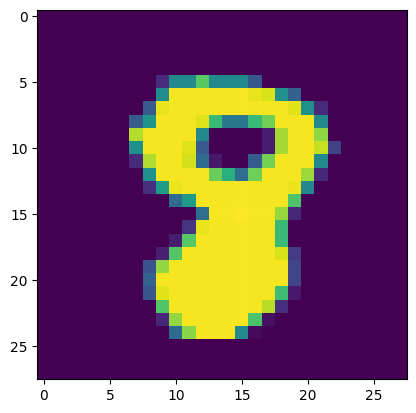

In [8]:
import matplotlib.pyplot as plt
i=np.random.randint(0,x_train.shape[0]) # i ranges from 0 to 59999
plt.imshow(x_train[i]) # demonstrating the images with each of the size 28x28 pixels 

In [9]:
y_train=to_categorical(y_train) # one hot encoding 
y_test=to_categorical(y_test)

In [10]:
# creating a basic cnn model for multiclass classification  
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(28,28,1))) # channel is 1 for greyscale image 
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

C:\Users\vivek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# lower dropout rate is preferred for cnn models to preserve edges 

In [12]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
# you can change or configure the optimizer using keras.optimizers and also can change learning rate

In [13]:
x_train = np.expand_dims(x_train, axis=-1)
x_test= np.expand_dims(x_test, axis=-1)
x_train.shape,x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [14]:
history=model.fit(x_train,y_train,epochs=10,batch_size=64,validation_data=(x_test,y_test))
# you can also use validation_data for evaluating data during training process to prevent overfitting in advance 

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.1397 - loss: 4.1410 - val_accuracy: 0.2854 - val_loss: 1.8766
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.2205 - loss: 2.0360 - val_accuracy: 0.2926 - val_loss: 1.8156
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.2390 - loss: 1.9787 - val_accuracy: 0.5069 - val_loss: 1.3861
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.3931 - loss: 1.5903 - val_accuracy: 0.9294 - val_loss: 0.3767
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.6227 - loss: 0.9932 - val_accuracy: 0.9629 - val_loss: 0.2032
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.7018 - loss: 0.8078 - val_accuracy: 0.9686 - val_loss: 0.1623
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.7495 - loss: 0.6901 - val_accuracy: 0.9770 - val_loss: 0.1385
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.8091 - loss: 0.5689 - 

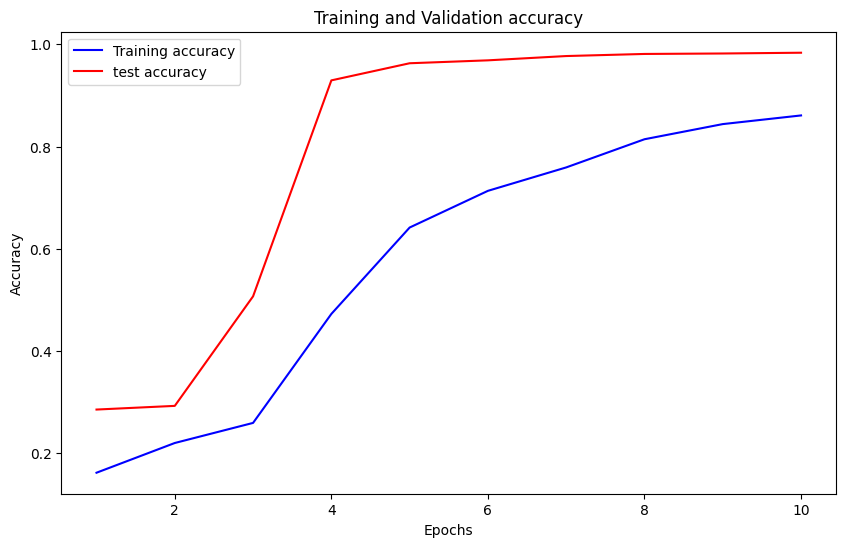

In [15]:
# Retrieve accuracy from history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)

# Plot the accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='test accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [16]:
# as you observe the above graph, the both train accuracy and test accuracy is increasing constantly and becomes constant after 5 or 6 epochs
# model learns noise from train data up to extent where it negatively impact test data, i.e called overfitting
# early stopping, or regularization techniques can be used to prevent overfitting
# if test accurayc is low and train accuracy is high then it is called underfitting 

In [17]:
# optimal epochs are 6
history=model.fit(x_train,y_train,epochs=6,batch_size=64)

Epoch 1/6
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.8754 - loss: 0.3948
Epoch 2/6
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.8885 - loss: 0.3619
Epoch 3/6
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.8950 - loss: 0.3389
Epoch 4/6
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9009 - loss: 0.3213
Epoch 5/6
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9051 - loss: 0.3050
Epoch 6/6
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9045 - loss: 0.3061


In [18]:
model.evaluate(x_test,y_test)[1]*100 # correct accuracy of the model

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9860 - loss: 0.0604


98.78000020980835

In [ ]:
# still we can also tune the number of neurons in each layer or dropout layer fraction
# we must consious whether our model is under fit or overfit